In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

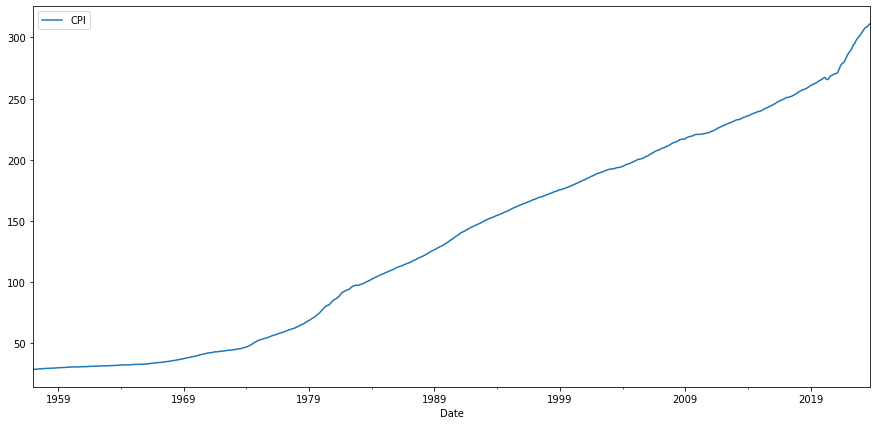

In [27]:
df=pd.read_csv('ConsumerPriceIndex.csv')

df.columns=["Date","CPI"]
df.describe()
df.set_index('Date',inplace=True)
df.index = pd.to_datetime(df.index)

from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
df.plot()
plt.savefig("CPI_Plot.png", dpi =300, facecolor = "white")


In [28]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df['CPI'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarni

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.CPI   No. Observations:                  801
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 149.707
Method:                       css-mle   S.D. of innovations              0.201
Date:                Tue, 28 Nov 2023   AIC                           -291.413
Time:                        22:21:49   BIC                           -272.670
Sample:                    02-01-1957   HQIC                          -284.213
                         - 10-01-2023                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3609      0.073      4.925      0.000       0.217       0.505
ar.L1.D.CPI     0.9705      0.013     74.846      0.000       0.945       0.996
ma.L1.D.CPI    -0.6839      0.052    -13.077      0.000      -0.786      -0.581
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0304           +0.0000j            1.0304            0.0000
MA.1            1.4622           +0.0000j            1.4622            0.0000
-----------------------------------------------------------------------------
"""

In [29]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['CPI'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


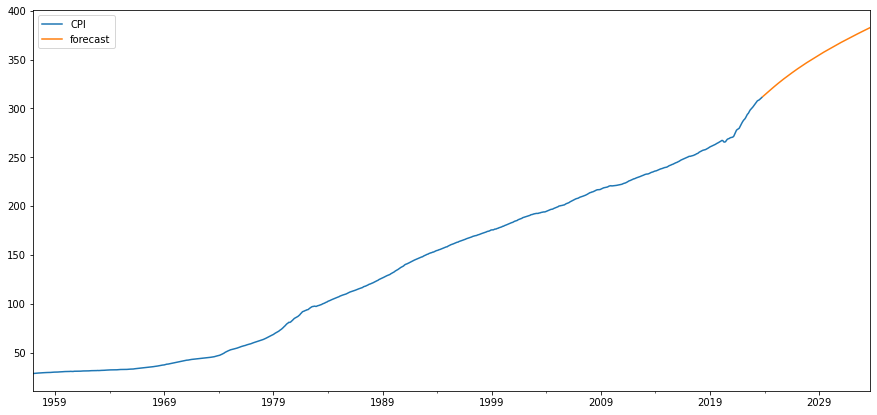

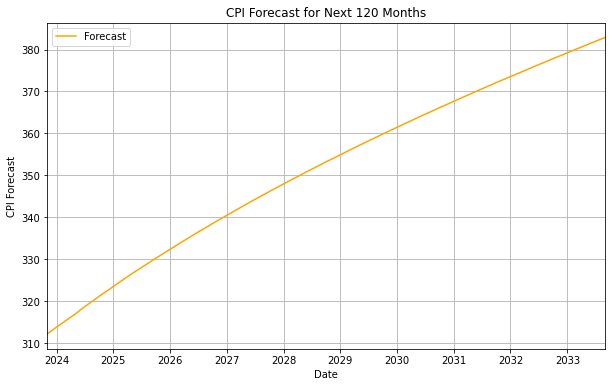

In [30]:
#2 year forcast:
# from pandas.tseries.offsets import DateOffset
# future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]
# future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

# future_datest_df.tail()

# future_df=pd.concat([df,future_datest_df])

# future_df['forecast'] = results.predict(start = 802, end = 826, dynamic= True)
# future_df[['CPI', 'forecast']].plot()
# plt.savefig("Overall_2Year_Forecast.png", dpi =300, facecolor = "white")

# future_df = pd.concat([df, future_datest_df])
# future_df['forecast'] = results.predict(start=802, end=922, dynamic=True)
# forecast_df = future_df[future_df['forecast'].notna()]

# plt.figure(figsize=(10, 6))
# plt.plot(forecast_df.index, forecast_df['forecast'], color='orange', label='Forecast')
# plt.title('CPI Forecast for Next 24 Months', color='black')
# plt.xlabel('Date', color='black')
# plt.ylabel('CPI Forecast', color='black')
# plt.grid(True)
# plt.xlim(forecast_df.index.min(), forecast_df.index.max())
# plt.legend() 
# plt.savefig("2Year_Forecast.png", dpi=300, facecolor="white")
# plt.show()

# __________________________________________________________________________________

#10 Year Forecast:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,120)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_datest_df.tail()
future_df=pd.concat([df,future_datest_df])
future_df['forecast'] = results.predict(start = 802, end = 922, dynamic= True)
future_df[['CPI', 'forecast']].plot()
plt.savefig("Overall_10Year_Forecast.png", dpi =300, facecolor = "white")
future_df = pd.concat([df, future_datest_df])
future_df['forecast'] = results.predict(start=802, end=922, dynamic=True)
forecast_df = future_df[future_df['forecast'].notna()]

plt.figure(figsize=(10, 6))
plt.plot(forecast_df.index, forecast_df['forecast'], color='orange', label='Forecast')
plt.title('CPI Forecast for Next 120 Months', color='black')
plt.xlabel('Date', color='black')
plt.ylabel('CPI Forecast', color='black')
plt.grid(True)
plt.xlim(forecast_df.index.min(), forecast_df.index.max())
plt.legend()  
plt.savefig("10Year_Forecast.png", dpi=300, facecolor="white")
plt.show()